
# 数据

### - For images, packages such as Pillow, OpenCV are useful
### - For audio, packages such as scipy and librosa
### - For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful

Specifically for vision, we have created a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
**torchvision有很多数据下载器可以下**

**载imagenet，MINIST等数据**
`torchvision.datasets` and `torch.utils.data.DataLoader`.

In [1]:
import torch.nn as nn
import torch
import torchvision.datasets as datasets
import torch.nn.functional as F

## 导入torchvision
### 下载CIFAR10数据集：训练集50000  测试集10000  内容包含自然生活中的场景


In [2]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#标准化图像数据
trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


### 将下载的数据导入到trainloader和testloader

***  
- batchsize = 4 表示一次加载四张
- shffle 表示是否打乱顺序

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=True, num_workers=2)

In [8]:
image,label = next(iter(trainloader))
image.shape

torch.Size([4, 3, 32, 32])

### 显示一张数据

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


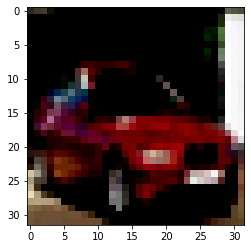

In [15]:
image,label = next(iter(trainloader))
image.shape

# def imshow(img):
#     img = img / 2 + 0.5  #标准化图像
#     img = img.numpy()
#     plt.imshow(np.transpose(img, (1,2,0)))  
#     plt.show()
# imshow(image[1])
img = image[1].numpy()
plt.imshow(np.transpose(img, (1,2,0)))
classes = ('plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(classes[label[1]])

## 查看数据集的大小类型

In [137]:
print(testset)
print(trainset)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


### 显示加载的数据

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision


def imshow(img):
    img = img / 2 + 0.5  # 标准化图像
    img = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))  
    plt.show()

# img = trainset[0][0]
# img = img.numpy()
# img = np.transpose(img, (1,2,0))
# plt.imshow(img)
img, label = next(iter(trainloader))
print(img.shape)
print(torchvision.utils.make_grid(img).shape)
print(np.transpose(torchvision.utils.make_grid(img),(1,2,0)).shape)
imshow(torchvision.utils.make_grid(img))
classes = ('plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# print(' '.join('%5s' % classes[label[i]]for i in range(4)))
print('   '.join('%5s '%classes[label[i]]for i in range(4)))

torch.Size([4, 3, 32, 32])
torch.Size([3, 36, 138])
torch.Size([36, 138, 3])


<Figure size 640x480 with 1 Axes>

  car      car      dog    plane 


## 定义一个神经网络模型 

In [22]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6, 5)
        self.conv2 = nn.Conv2d(6,16, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16*5*5,40)
        self.fc2 = nn.Linear(40, 10)
    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 数据训练
- 定义优化参数
- 定义损失函数
- 迭代

In [20]:
x=torch.rand(5)
enumerate(x, 0)

In [24]:
import torch.optim as optim
net = Net()

optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

criterion = nn.CrossEntropyLoss()

runing_loss = 0

for epoch in range(2):
    runing_loss = 0.0
    for i, (imgs,labels) in enumerate(trainloader,0):
#         imgs.to("cuda")
#         labels = labels.cuda()
        output = net(imgs)
        optimizer.zero_grad()
        
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        runing_loss += loss.item()
        if i%2000 == 1999:
            print(epoch+1, ' ',i+1,' loss', runing_loss/2000)
            runing_loss = 0

1   2000  loss 2.01280617544055
1   4000  loss 1.676117361113429
1   6000  loss 1.5896893465071917
1   8000  loss 1.515554117977619
1   10000  loss 1.4745981756299733
1   12000  loss 1.433620807506144
2   2000  loss 1.3625063030347229
2   4000  loss 1.3610958919748664
2   6000  loss 1.3484743522703648
2   8000  loss 1.3226434143595398
2   10000  loss 1.2987060759589075
2   12000  loss 1.3054342086315156


# 保存训练结束后的参数

In [25]:
#保存训练结果参数
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# 测试训练结果
- 定义模型结构
- 下载保存的结果参数
- 查看测试集的结果

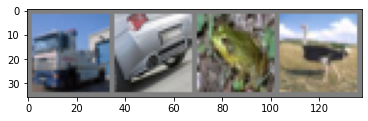

truck      truck       frog      plane


In [145]:
#测试训练结果
net = Net()
net.load_state_dict(torch.load(PATH))
#查看一个结果
test_imgs, test_ = next(iter(testloader))
output = net(test_imgs)
_, predicts = torch.max(output,1)
imshow(torchvision.utils.make_grid(test_imgs))# 一定要make——grid才能显示
print('      '.join('%5s'% classes[predicts[i]]for i in range(4)))

# 查看整个测试集的正确率


In [135]:
#查看整个测试集的正确率
total = 0
correct = 0
for i, (test_imgs, test_labels) in enumerate(testloader):
    output = net(test_imgs)
    _,predicts = torch.max(output,1)
    total += test_labels.size(0)
    correct += (predicts == test_labels).sum().item()
print('correct',correct/total)

correct 0.5496
